# **Comprehensive Guide to Gated Recurrent Units (GRU)**

---

## **Notebook Structure**
1. **Metadata**
2. **Title and Objective**
3. **Acknowledgement**
4. **Exploratory Data Analysis (EDA)**
5. **Concept Explanation**
   - What is GRU?
   - Why Use GRU?
   - GRU vs. LSTM
6. **Mathematical Intuition**
7. **Advantages and Disadvantages**
8. **Model Implementation**
   - Data Preparation
   - Building the Model
   - Training the Model
9. **Model Performance Evaluation**
   - Accuracy and Loss Curves
   - Predictions and Metrics
10. **Learnings and Conclusion**

---

## **1. Metadata**

- **Dataset**: IMDb Large Movie Review Dataset
- **Task**: Sentiment Analysis
- **Tech Stack**: TensorFlow, Keras, Python
- **Model**: Gated Recurrent Unit (GRU)

---

## **2. Title and Objective**

### **Title**
**Sentiment Analysis using GRU on IMDb Dataset**

### **Objective**
To understand and implement **Gated Recurrent Units (GRU)** for **sentiment analysis** and evaluate its performance in comparison to LSTM.

---

## **3. Acknowledgement**
The dataset is sourced from the [Keras IMDb dataset](https://keras.io/api/datasets/imdb/). Special thanks to the creators for making this dataset accessible for research and educational purposes.

---

## **4. Exploratory Data Analysis (EDA)**


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


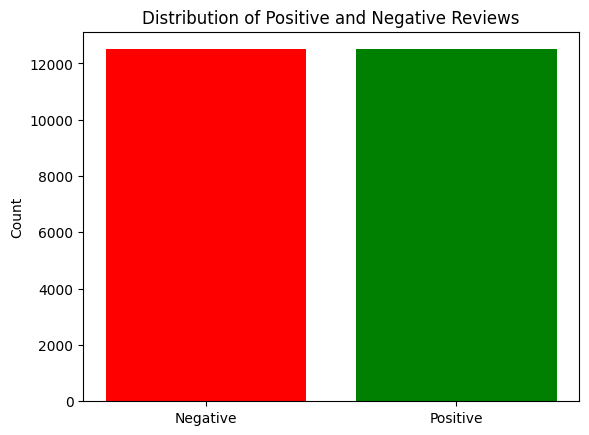

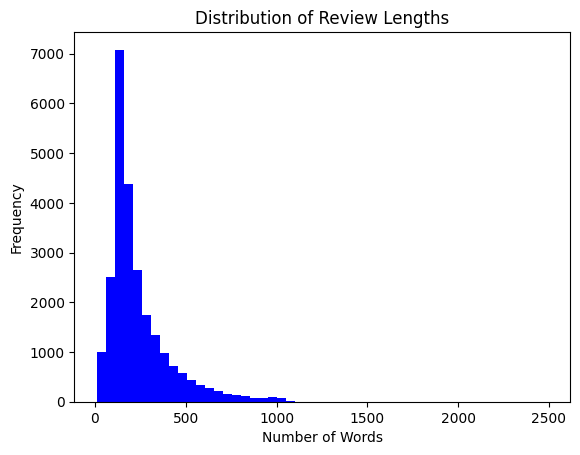

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tensorflow.keras.datasets import imdb

# Load IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Visualizing the distribution of reviews (positive vs. negative)
classes = ["Negative", "Positive"]
counts = Counter(y_train)
plt.bar(classes, [counts[0], counts[1]], color=['red', 'green'])
plt.title("Distribution of Positive and Negative Reviews")
plt.ylabel("Count")
plt.show()

# Checking the length of reviews
review_lengths = [len(x) for x in x_train]
plt.hist(review_lengths, bins=50, color='blue')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### **EDA Insights**
1. **Class Distribution**: The dataset is balanced, with equal numbers of positive and negative reviews.
2. **Review Lengths**: Most reviews have 100–150 words, suggesting a suitable padding length (e.g., `maxlen=100`).


# **Gated Recurrent Unit (GRU) – A Comprehensive Guide**  

Gated Recurrent Unit (GRU) is an advanced recurrent neural network (RNN) architecture designed to improve upon traditional RNNs by **solving the vanishing gradient problem**. It is a **simplified version of LSTM (Long Short-Term Memory)**, offering computational efficiency while maintaining strong memory retention capabilities.  

---

## **1. Introduction to GRU**  

### **Why Do We Need GRUs?**  
Traditional RNNs struggle with **long-term dependencies** because of the **vanishing gradient problem**—gradients shrink exponentially during backpropagation, making it difficult to update distant weights effectively.  

GRUs solve this by using **gates** that regulate the flow of information, helping the network retain long-term dependencies without suffering from excessive computational costs.  

### **Where is GRU Used?**  
GRUs are widely applied in:  
- **Natural Language Processing (NLP):** Machine translation, text summarization, sentiment analysis  
- **Speech Recognition:** Audio processing and speech-to-text applications  
- **Time-Series Prediction:** Stock price forecasting, weather prediction  
- **Anomaly Detection:** Fraud detection in transactions, network intrusion detection  
- **Video Processing:** Action recognition, video captioning  

---

## **2. GRU vs. RNN vs. LSTM**  

| Feature | RNN | GRU | LSTM |
|---------|-----|-----|------|
| **Handles Long-Term Dependencies** | ❌ No | ✅ Yes | ✅ Yes |
| **Solves Vanishing Gradient** | ❌ No | ✅ Yes | ✅ Yes |
| **Memory Retention** | ❌ Poor | ✅ Good | ✅ Excellent |
| **Computation Cost** | ✅ Low | ✅ Medium | ❌ High |
| **Gates Used** | None | Update & Reset | Forget, Input, Output |
| **Parameter Count** | ✅ Low | ✅ Medium | ❌ High |
| **Training Speed** | ✅ Fast | ✅ Faster than LSTM | ❌ Slower |

**Key Takeaways:**  
- GRU **trains faster** than LSTM because it has **fewer parameters**.  
- LSTM is **more powerful** for very long sequences but is **computationally expensive**.  
- GRU is a **good balance** between RNN and LSTM, offering **better memory retention** than RNNs while being **simpler than LSTM**.  

---

## **3. GRU Architecture & Components**  

Unlike LSTMs, which have three gates (**forget, input, output**), GRUs have only **two gates**:  

### **1️⃣ Update Gate (\(z_t\))**
- Controls how much of the previous memory (\(h_{t-1}\)) should be carried forward to the next step.  
- A higher value means more past information is retained.  

### **2️⃣ Reset Gate (\(r_t\))**
- Controls how much of the previous memory should be **forgotten**.  
- If \( r_t \) is **close to 0**, the model **forgets** past memory completely.  

### **3️⃣ Candidate Activation (\(\tilde{h}_t\))**
- Represents the **new memory content** that could be added to the network.  
- A function of the current input and past hidden state.  

### **4️⃣ Final Hidden State (\(h_t\))**
- A **weighted combination** of past memory and new memory, controlled by the **update gate**.  

---

## **4. Mathematical Formulation of GRU**  

At each time step \( t \), GRU performs the following computations:  

### **1️⃣ Update Gate ( \(z_t\) )**
\[
z_t = \sigma(W_z x_t + U_z h_{t-1} + b_z)
\]
- Uses a **sigmoid activation function (\(\sigma\))** to squash values between 0 and 1.  
- If \(z_t\) is **close to 1**, previous memory is retained.  

### **2️⃣ Reset Gate ( \(r_t\) )**
\[
r_t = \sigma(W_r x_t + U_r h_{t-1} + b_r)
\]
- If \(r_t\) is **close to 0**, past information is forgotten.  
- This makes GRU flexible to **reset memory** when necessary.  

### **3️⃣ Candidate Activation ( \( \tilde{h}_t \) )**
\[
\tilde{h}_t = \tanh(W_h x_t + U_h (r_t \odot h_{t-1}) + b_h)
\]
- Represents the **new memory content** based on the current input.  
- The **reset gate** decides how much of the past should contribute to this memory.  

### **4️⃣ Final Hidden State ( \(h_t\) )**
\[
h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t
\]
- A **linear interpolation** between past hidden state (\(h_{t-1}\)) and the newly computed memory (\(\tilde{h}_t\)).  
- The **update gate (\(z_t\))** determines the contribution of past vs. new information.  

---

## **5. Key Advantages of GRU**  

✔️ **Fewer Parameters:** Unlike LSTM, GRU **does not have an output gate**, reducing computational complexity.  
✔️ **Faster Training:** Due to fewer computations, GRUs train **faster** and require **less memory**.  
✔️ **Long-Term Dependencies:** GRUs **retain useful information longer** than traditional RNNs.  
✔️ **Flexible Memory Control:** The reset gate allows the model to **decide when to forget** past information.  
✔️ **Performs Well on Small Datasets:** Works efficiently even when training data is limited.  

---

## **6. Limitations of GRU**  

❌ **Loses Fine-Grained Memory Control** → LSTM’s extra gate (forget gate) provides better control over memory.  
❌ **Struggles with Extremely Long Sequences** → While better than RNNs, LSTM still outperforms GRU in very long text sequences.  
❌ **Less Widely Used than LSTM** → Some frameworks and pre-trained models favor LSTMs, making it harder to find GRU-based architectures.  

---

## **7. Applications of GRU in Real-World AI Systems**  

**📌 Speech Processing:**  
- Google Assistant, Alexa, and Siri use GRUs for **speech recognition**.  

**📌 Machine Translation:**  
- Google Translate uses **GRU-based Seq2Seq models** for translating languages.  

**📌 Stock Market Prediction:**  
- GRUs are used for **predicting future stock prices** based on historical trends.  

**📌 Healthcare:**  
- ECG anomaly detection, **disease diagnosis**, and patient monitoring.  

**📌 Chatbots & Conversational AI:**  
- Facebook Messenger bots and **virtual assistants** leverage GRU models.  

---

## **8. When to Use GRU vs. LSTM?**  

| Scenario | Use GRU | Use LSTM |
|----------|--------|---------|
| **Fast Training Required** | ✅ Yes | ❌ No |
| **Small Datasets** | ✅ Yes | ❌ No |
| **Long-Term Dependencies Needed** | ❌ No | ✅ Yes |
| **Memory Efficiency Important** | ✅ Yes | ❌ No |
| **Extremely Long Sequences** | ❌ No | ✅ Yes |

### **General Rule of Thumb:**
- If **speed & efficiency** matter → **Use GRU**  
- If **deep memory retention** is needed → **Use LSTM**  

---

## **Final Thoughts**  

Gated Recurrent Units (GRUs) offer a **powerful balance** between **speed, efficiency, and memory retention**. While **LSTMs excel in long-memory tasks**, GRUs are a **great alternative** when you need faster training and lower computational costs.  

💡 **Key Takeaways:**  
- GRUs **retain memory well** and **train faster** than LSTMs.  
- They use only **two gates** (Update & Reset), reducing complexity.  
- Ideal for **chatbots, speech recognition, and time-series forecasting**.  

🚀 **Next Steps:**  
- Explore real-world applications like **machine translation and speech synthesis**.  
- Compare GRU and LSTM in practical tasks to understand their trade-offs.  
- Experiment with **stacked GRU layers** for better performance.  

Let me know if you need any more details! 🚀🔥

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the sequences
maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")


Shape of x_train: (25000, 100)
Shape of x_test: (25000, 100)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Building the GRU Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    GRU(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 324ms/step - accuracy: 0.6380 - loss: 0.6123 - val_accuracy: 0.8182 - val_loss: 0.4186
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 105s 337ms/step - accuracy: 0.8577 - loss: 0.3424 - val_accuracy: 0.8472 - val_loss: 0.3625
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 326ms/step - accuracy: 0.9071 - loss: 0.2406 - val_accuracy: 0.8512 - val_loss: 0.3462
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 102s 324ms/step - accuracy: 0.9427 - loss: 0.1626 - val_accuracy: 0.8384 - val_loss: 0.4176
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 158s 377ms/step - accuracy: 0.9661 - loss: 0.1024 - val_accuracy: 0.8330 - val_loss: 0.4596


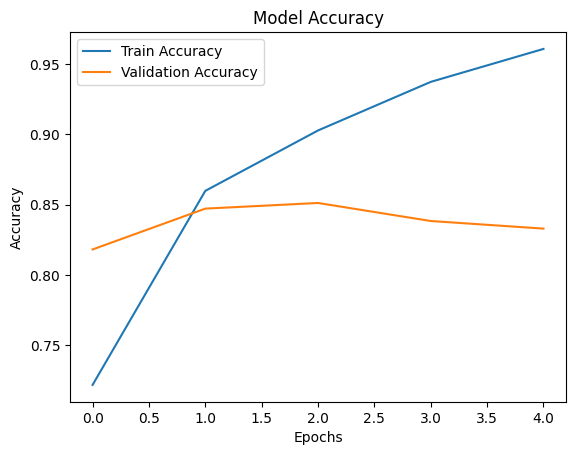

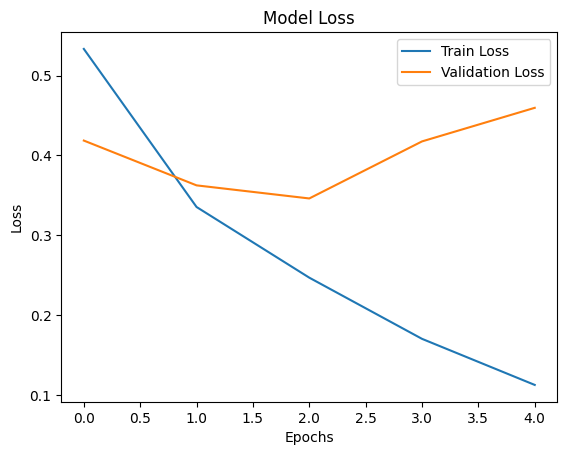

In [5]:
# Plotting Accuracy and Loss Curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### **Learnings**
1. GRUs offer a more efficient alternative to LSTMs for sequential tasks.
2. They achieve comparable performance with fewer parameters.
3. Proper preprocessing (e.g., padding, vocabulary selection) affects accuracy.

### **Conclusion**
GRU networks are an effective deep learning model for sentiment analysis, offering a balance between **performance and computational efficiency**.
